In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Hand_fracture_classifier/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

# **DOWNLOADING IMAGES**

In [0]:
folder='fracture'
# file='urls_fracture_xray_hand.txt'
file='urls_hand_fracture_new.txt'


In [0]:
folder='normal'
# file='urls_normal_xray_hand.txt'
file='urls_hand_normal.txt'

In [0]:
path = Path(base_dir+'data/XRAYS')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Hand_fracture_classifier/data/XRAYS/fracture'),
 PosixPath('/content/gdrive/My Drive/Hand_fracture_classifier/data/XRAYS/normal'),
 PosixPath('/content/gdrive/My Drive/Hand_fracture_classifier/data/XRAYS/urls_fracture_xray_hand.txt'),
 PosixPath('/content/gdrive/My Drive/Hand_fracture_classifier/data/XRAYS/urls_normal_xray_hand.txt'),
 PosixPath('/content/gdrive/My Drive/Hand_fracture_classifier/data/XRAYS/urls_hand_fracture_new.txt'),
 PosixPath('/content/gdrive/My Drive/Hand_fracture_classifier/data/XRAYS/urls_hand_normal.txt')]

In [0]:
print(path/file)
download_images(path/file, dest)

In [0]:
# download_images(path/file, dest, max_pics=20, max_workers=0)

In [0]:
classes=['fracture', 'normal']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
for c in classes:
  p2=path/c
  print(c)
  print(len(p2.ls()))

fracture
535
normal
326


# **CREATING DATA BUNCH**

In [0]:
np.random.seed(42)

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# src=(ImageList.from_folder(path)
# .label_from_folder()
# .random_split_by_pct(0.2))

# data=(src.datasets().transform(get_transforms(), size=224).databunch().normalize(imagenet_stats))


In [0]:
data.classes


['fracture', 'normal']

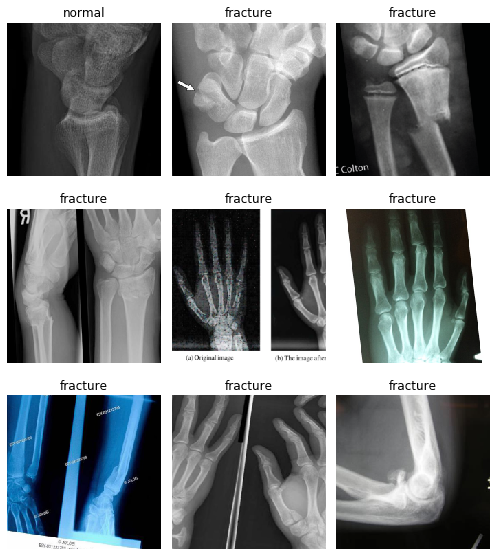

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fracture', 'normal'], 2, 665, 166)

# **LEARNING**


In [0]:
metrics=[error_rate,accuracy]

**RESNEST34**


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 211MB/s]


In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.282579,0.876551,0.403614,0.596386,02:00
1,1.141474,0.787100,0.319277,0.680723,00:12
2,1.015597,0.875750,0.385542,0.614458,00:11
3,0.895357,0.813700,0.331325,0.668675,00:11
4,0.850529,0.725124,0.319277,0.680723,00:11
5,0.783580,0.653557,0.319277,0.680723,00:11
6,0.736836,0.649462,0.325301,0.674699,00:11
7,0.702799,0.631451,0.331325,0.668675,00:11


In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.544672,0.627696,0.289157,0.710843,00:11
1,0.544488,0.884197,0.331325,0.668675,00:11
2,0.561272,0.910858,0.349398,0.650602,00:11
3,0.535043,1.202570,0.301205,0.698795,00:11
4,0.508789,0.998577,0.361446,0.638554,00:11
5,0.455759,0.928097,0.295181,0.704819,00:11
6,0.406279,0.870701,0.277108,0.722892,00:11
7,0.363966,0.848180,0.295181,0.704819,00:11


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


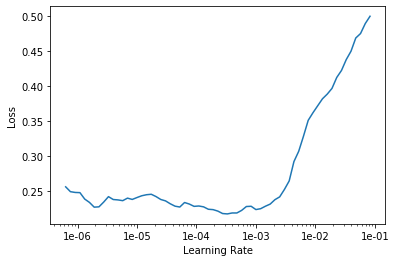

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.150585,0.882638,0.277108,0.722892,00:12
1,0.165770,0.895241,0.277108,0.722892,00:11
2,0.162318,0.924566,0.271084,0.728916,00:11
3,0.147710,1.004123,0.313253,0.686747,00:11
4,0.151736,0.996063,0.289157,0.710843,00:11
5,0.143844,1.003325,0.295181,0.704819,00:11
6,0.133190,0.999886,0.301205,0.698795,00:11
7,0.124809,1.011475,0.295181,0.704819,00:11


In [0]:
learn.save("stage-2(lr_rate-1e-5-1e-3)")

In [0]:
learn.fit_one_cycle(4,max_lr=slice(1e-55,1e-45))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.128922,1.010433,0.301205,0.698795,00:12
1,0.110784,1.016480,0.295181,0.704819,00:11
2,0.112174,1.019233,0.301205,0.698795,00:11
3,0.107954,1.014855,0.301205,0.698795,00:11


In [0]:
learn.save("stage-2(lr_rate-1e-55-1e-45)")

In [0]:
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.110351,1.137878,0.295181,0.704819,00:12
1,0.167027,1.439508,0.325301,0.674699,00:11
2,0.233509,1.016338,0.277108,0.722892,00:11
3,0.237881,0.837665,0.289157,0.710843,00:11


In [0]:
learn.save("stage-2(lr_rate-3e-5-3e-3)")

**RESNET50**

In [0]:
learn50 = cnn_learner(data, models.resnet50, metrics=metrics)

In [0]:
learn50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.228276,0.887138,0.349398,0.650602,00:12
1,1.211123,1.108911,0.391566,0.608434,00:12
2,1.116207,1.011494,0.343374,0.656627,00:12
3,0.992575,0.794697,0.295181,0.704819,00:12
4,0.873707,0.719729,0.301205,0.698795,00:12
5,0.794795,0.684832,0.295181,0.704819,00:12
6,0.717560,0.653750,0.301205,0.698795,00:12
7,0.651627,0.643702,0.301205,0.698795,00:12


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fa96a1b4cc0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fa96a1b4cc0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/usr/local/l

In [0]:
learn50.save("stage-1(50)")

In [0]:
learn50.unfreeze()

In [0]:
learn50.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.564242,0.778291,0.307229,0.692771,00:12
1,0.620340,1.127401,0.301205,0.698795,00:12
2,0.626258,0.829463,0.337349,0.662651,00:12
3,0.569298,0.799678,0.301205,0.698795,00:12
4,0.503659,0.712700,0.307229,0.692771,00:12
5,0.446493,0.700703,0.289157,0.710843,00:12


In [0]:
learn50.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


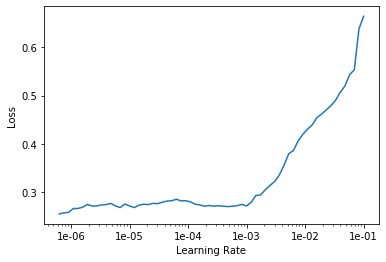

In [0]:
learn50.recorder.plot()

In [0]:
learn50.fit_one_cycle(4,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.276672,0.700648,0.319277,0.680723,00:12
1,0.272622,0.701010,0.295181,0.704819,00:12
2,0.256577,0.696423,0.289157,0.710843,00:12
3,0.240330,0.700389,0.307229,0.692771,00:12


In [0]:
learn50.save("stage-2(50)(lr_rate-1e-5-1e-4)")

In [0]:
learn50.fit_one_cycle(4,max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.204525,0.860834,0.283133,0.716867,00:13
1,0.267494,1.151700,0.307229,0.692771,00:12
2,0.288212,0.875498,0.337349,0.662651,00:12
3,0.277126,0.809293,0.307229,0.692771,00:12


In [0]:
learn50.save("stage-2(50)(lr_rate-3e-5-3e-3)")

# **INTERPRETATION**


**RESNET34**

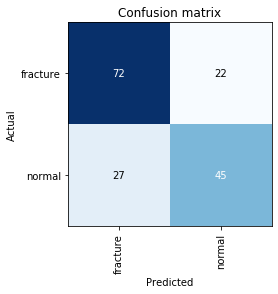

In [0]:
learn.load("stage-2(lr_rate-1e-5-1e-3)")
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

**RESNET50**

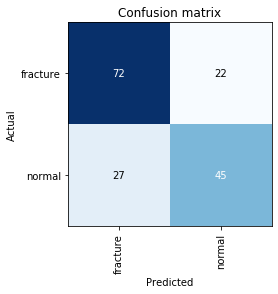

In [0]:
learn50.load("stage-2(50)(lr_rate-1e-5-1e-4)")
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()